In [7]:
"""
Exp02B: Volatility Targeting Sensitivity

Goal:
- Examine how leverage caps (MAX_SCALE) affect the risk–return trade-off
  under volatility targeting.
- Assess whether the benefits of risk control are robust to different
  exposure limits.


Fixed:
- Same as Exp02A

Sweep:
- MAX_SCALE ∈ {0.5, 1.0, 2.0}

Evaluation:
- Risk–return trade-off
- Drawdown vs return

"""

'\nExp02B: Volatility Targeting Sensitivity\n\nGoal:\n- Examine how leverage caps (MAX_SCALE) affect the risk–return trade-off\n  under volatility targeting.\n- Assess whether the benefits of risk control are robust to different\n  exposure limits.\n\n\nFixed:\n- Same as Exp02A\n\nSweep:\n- MAX_SCALE ∈ {0.5, 1.0, 2.0}\n\nEvaluation:\n- Risk–return trade-off\n- Drawdown vs return frontier\n\n'

In [8]:
import os
os.chdir("/Users/kim/Desktop/Quant-Research")
print(os.getcwd())

# os.chdir("..")
# print(os.getcwd())

/Users/kim/Desktop/Quant-Research


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from dataclasses import replace

from config import Config
from runner import run

In [10]:
### baseline:  config

cfg_base = Config(
    MA_WINDOW=60,          # 用 Exp01 选的窗口
    RISK_MODE="vol_target",
)

In [11]:
### Sweep MAX_SCALE

rows = []

for max_scale in [0.5, 1.0, 1.5, 2.0]:
    cfg_tmp = replace(
        cfg_base,
        MAX_SCALE=max_scale,
        MIN_SCALE=0.0,
    )
    
    _, summary = run(cfg_tmp)
    summary["MAX_SCALE"] = max_scale
    rows.append(summary)

exp02b = pd.DataFrame(rows).sort_values("MAX_SCALE")
exp02b


/Users/kim/Desktop/Quant-Research/data/loaders.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(path, index_col=0, parse_dates=True)
/Users/kim/Desktop/Quant-Research/data/loaders.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  idx = pd.to_datetime(df.index, errors="coerce")
/Users/kim/Desktop/Quant-Research/data/loaders.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(path, index_col=0, parse_dates=True)
/Users/kim/Desktop/Quant-Research/data/loaders.py:22: UserWarning: Could not infer format, so each element will be parsed in

,Annual Return,Max Drawdown,Sharpe,Total Turnover,N_obs,MAX_SCALE
0,0.022204,-0.128475,0.432418,82.037865,2456,0.5
1,0.038823,-0.224189,0.436955,154.169767,2456,1.0
2,0.048169,-0.256053,0.439884,206.411515,2456,1.5
3,0.048694,-0.273216,0.414479,245.107081,2456,2.0


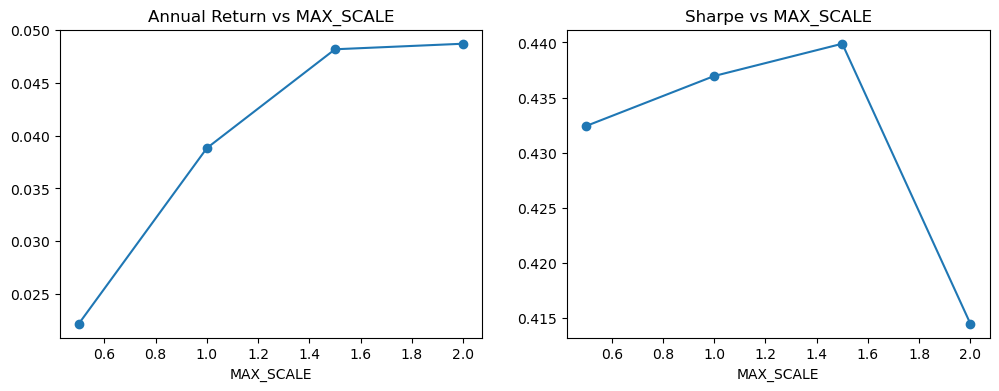

In [16]:
### 画图：Return / Sharpe vs MAX_SCALE

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

exp02b.set_index("MAX_SCALE")["Annual Return"].plot(
    ax=ax[0], marker="o", title="Annual Return vs MAX_SCALE"
)

exp02b.set_index("MAX_SCALE")["Sharpe"].plot(
    ax=ax[1], marker="o", title="Sharpe vs MAX_SCALE"
)

plt.show()


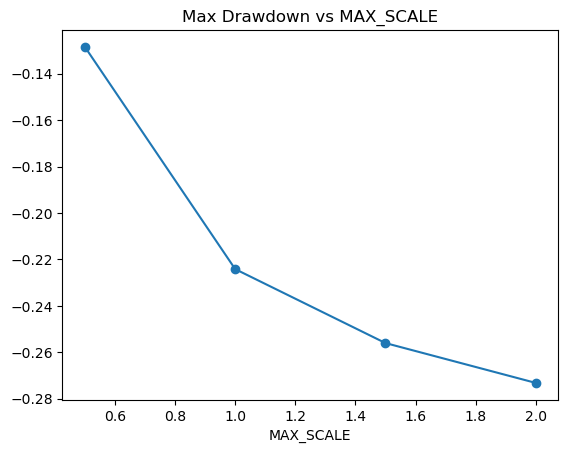

In [13]:
### 画图：Drawdown vs MAX_SCALE
exp02b.set_index("MAX_SCALE")["Max Drawdown"].plot(
    marker="o",
    title="Max Drawdown vs MAX_SCALE"
)
plt.show()